In [47]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt
import random as rng

In [48]:
sift = cv.SIFT_create()
bf = cv.BFMatcher()
flann = cv.FlannBasedMatcher()

In [103]:
def calcFMatrix(img1, img2):
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    matches = flann.knnMatch(des1,des2,k=2)
    inlier1 = []
    inlier2 = []
    for m,n in matches:
        if(m.distance < 0.75*n.distance):
            inlier2.append(kp2[m.trainIdx].pt)
            inlier1.append(kp1[m.queryIdx].pt)
    inlier1 = np.int32(inlier1)
    inlier2 = np.int32(inlier2)
    F, mask = cv.findFundamentalMat(inlier1,inlier2,cv.FM_LMEDS, 0.1)
    inlier1 = inlier1[mask.ravel()==1]
    inlier2 = inlier2[mask.ravel()==1]
    return F, inlier1, inlier2

In [76]:
def imgRect(img1,img2,points1,points2,F,imgSize):
    res,H1,H2 = cv.stereoRectifyUncalibrated(points1,points2,F,imgSize)
    out1 = cv.warpPerspective(img1, H1, imgSize,flags = cv.INTER_LINEAR)
    out2 = cv.warpPerspective(img2, H2, imgSize,flags = cv.INTER_LINEAR)
    return out1,out2

In [77]:
def calcDispMap(img1,img2,numDisp,blockSize):
    stereo = cv.StereoBM_create(numDisp, blockSize)
    disp = stereo.compute(img1, img2).astype(np.float32)/16.0
    disp = disp+1
    disp = disp/numDisp
    return disp

# Tape

In [78]:
img1 = cv.imread("tape_l.jpg")
img2 = cv.imread("tape_r.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'img r')

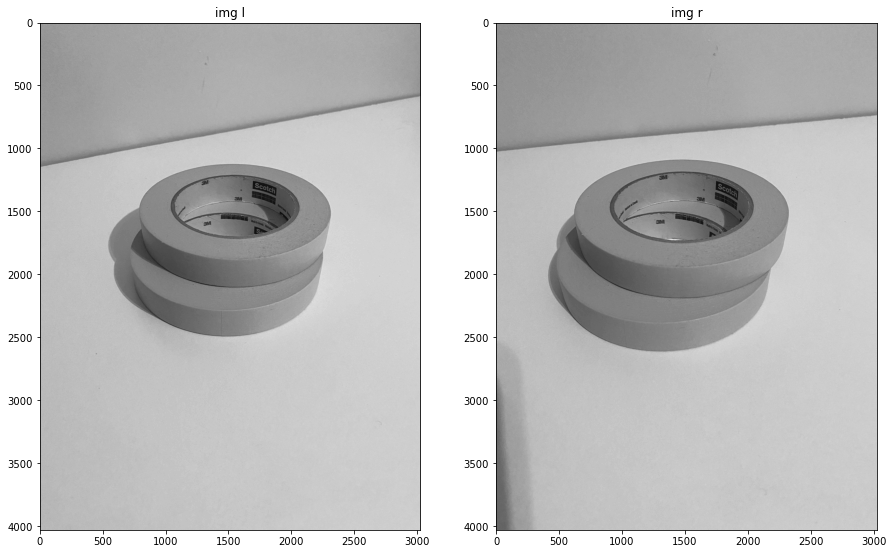

In [79]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("img l")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("img r")

Text(0.5, 1.0, 'img r')

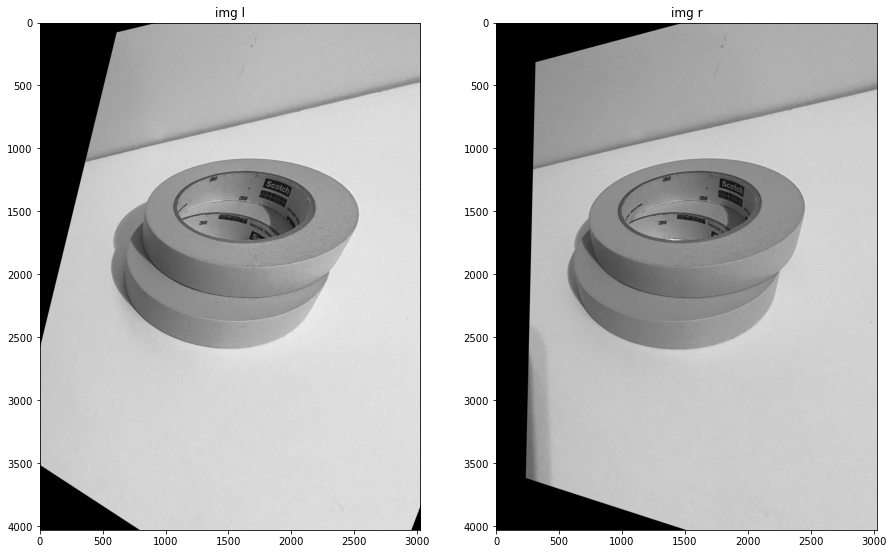

In [107]:
F,inlier1,inlier2 = calcFMatrix(img1,img2)

out1,out2 = imgRect(img1,img2,inlier1,inlier2,F,(img1.shape[1],img1.shape[0]))

figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(out1, cmap='gray')
ax[0].set_title("img l")
ax[1].imshow(out2, cmap='gray')
ax[1].set_title("img r")

In [112]:
disp = calcDispMap(out1,out2,256,5)

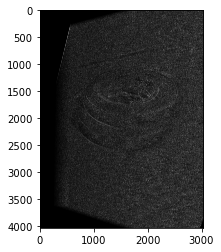

In [113]:
plt.imshow(disp,cmap='gray')

# Coaster

In [114]:
img1 = cv.imread("coaster_left.jpg")
img2 = cv.imread("coaster_right.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'img r')

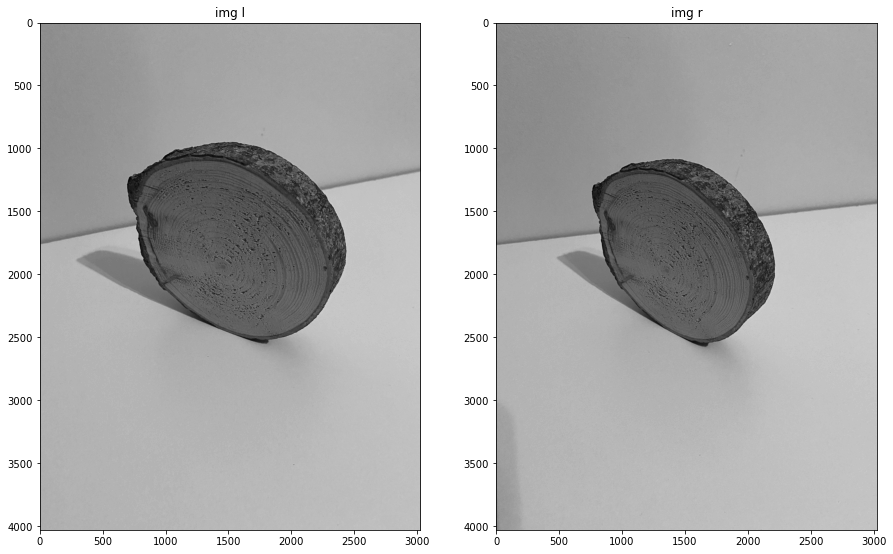

In [115]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("img l")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("img r")

In [116]:
F,inlier1,inlier2 = calcFMatrix(img1,img2)

In [117]:
out1,out2 = imgRect(img1,img2,inlier1,inlier2,F,(img1.shape[1],img1.shape[0]))

Text(0.5, 1.0, 'img r')

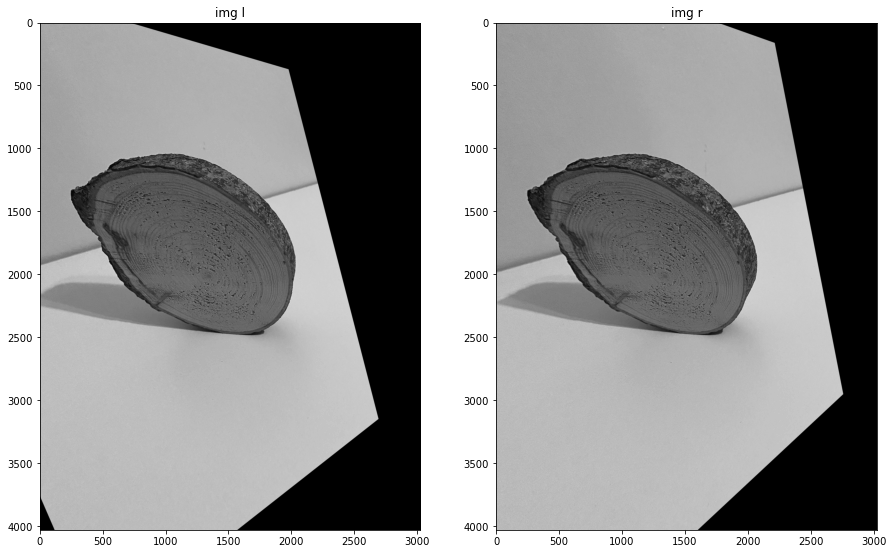

In [118]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(out1, cmap='gray')
ax[0].set_title("img l")
ax[1].imshow(out2, cmap='gray')
ax[1].set_title("img r")

In [119]:
disp = calcDispMap(out1,out2,256,5)

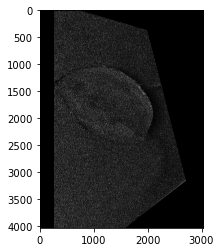

In [120]:
plt.imshow(disp,cmap='gray')

# Bike

In [122]:
img1 = cv.imread("bike_l.png")
img2 = cv.imread("bike_r.png")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'img r')

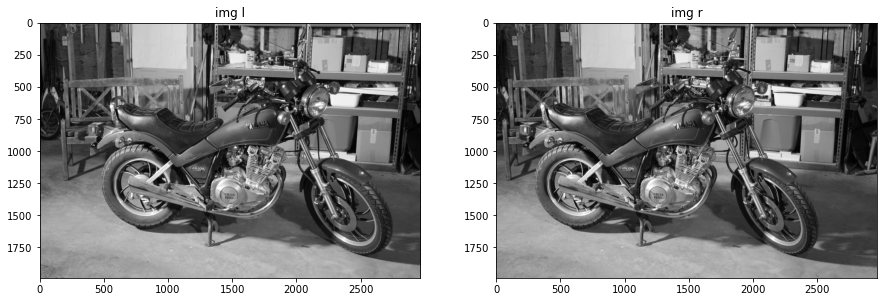

In [123]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("img l")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("img r")

In [124]:
F,inlier1,inlier2 = calcFMatrix(img1,img2)

In [125]:
out1,out2 = imgRect(img1,img2,inlier1,inlier2,F,(img1.shape[1],img1.shape[0]))

Text(0.5, 1.0, 'img r')

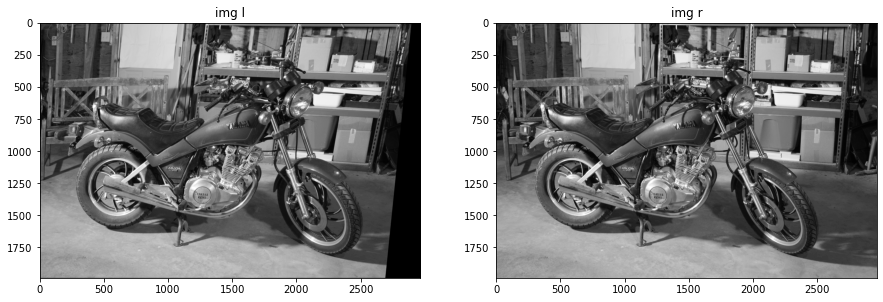

In [126]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(out1, cmap='gray')
ax[0].set_title("img l")
ax[1].imshow(out2, cmap='gray')
ax[1].set_title("img r")

In [133]:
disp = calcDispMap(out1,out2,128,5)

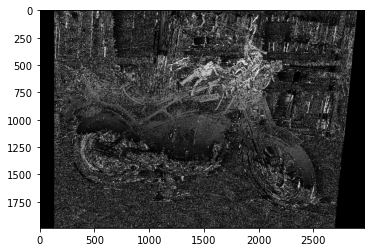

In [134]:
plt.imshow(disp,cmap='gray')